In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/cars.csv',index_col='Unnamed: 0');
    

In [5]:
x = df['speed'].values
y = df['dist'].values
w = tf.random.uniform([1])
b = tf.random.uniform([1])
print("x=",x)
print("y=",y)
print("w=",w)
print("b=",b)


x= [ 4  4  7  7  8  9 10 10 10 11 11 12 12 12 12 13 13 13 13 14 14 14 14 15
 15 15 16 16 17 17 17 18 18 18 18 19 19 19 20 20 20 20 20 22 23 24 24 24
 24 25]
y= [  2  10   4  22  16  10  18  26  34  17  28  14  20  24  28  26  34  34
  46  26  36  60  80  20  26  54  32  40  32  40  50  42  56  76  84  36
  46  68  32  48  52  56  64  66  54  70  92  93 120  85]
w= tf.Tensor([0.3100046], shape=(1,), dtype=float32)
b= tf.Tensor([0.28683984], shape=(1,), dtype=float32)


In [ ]:
Adam = tf.keras.optimizers.Adam # SGD [ (+) Momentum ,  (+) {Adagrad, RMSProp} ] --> Adam 방향도 스텝도 자유자래로 

Sequential = tf.keras.Sequential
Dense      = tf.keras.layers.Dense

optimizer = Adam(learning_rate = 0.01)
dense = Dense(units =1, input_dim =1)

model = Sequential([dense])
model.compile(loss = 'mse', optimizer=Adam(0.1))
model.fit(x,y,epochs=500)
w, b = dense.get_weights()
print(w)
print(b)
model.predict(np.array([10]))
                   
hist_cost = []

for i in range(2000):
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((w*x+b-y)**2)
    gradients = tape.gradient(cost, [w, b])
    optimizer.apply_gradients(zip(gradients, [w,b]) )

    c = t_n(cost)
    print("i = %4d, cost: %8.4f"%(i,c))
    hist_cost.append(c)
    if( t_n(cost) <1e-4): break

print("w= %8.4f, b=%8.4f"%(t_n(w),t_n(b)))


i =    0, cost: 1901.4515
i =    1, cost: 1887.5685
i =    2, cost: 1873.7461
i =    3, cost: 1859.9856
i =    4, cost: 1846.2878
i =    5, cost: 1832.6541
i =    6, cost: 1819.0850
i =    7, cost: 1805.5817
i =    8, cost: 1792.1453
i =    9, cost: 1778.7764
i =   10, cost: 1765.4758
i =   11, cost: 1752.2446
i =   12, cost: 1739.0835
i =   13, cost: 1725.9929
i =   14, cost: 1712.9739
i =   15, cost: 1700.0275
i =   16, cost: 1687.1536
i =   17, cost: 1674.3534
i =   18, cost: 1661.6272
i =   19, cost: 1648.9756
i =   20, cost: 1636.3992
i =   21, cost: 1623.8984
i =   22, cost: 1611.4736
i =   23, cost: 1599.1251
i =   24, cost: 1586.8536
i =   25, cost: 1574.6591
i =   26, cost: 1562.5419
i =   27, cost: 1550.5024
i =   28, cost: 1538.5409
i =   29, cost: 1526.6573
i =   30, cost: 1514.8521
i =   31, cost: 1503.1251
i =   32, cost: 1491.4766
i =   33, cost: 1479.9066
i =   34, cost: 1468.4153
i =   35, cost: 1457.0024
i =   36, cost: 1445.6683
i =   37, cost: 1434.4128
i =   38, co

(200.0, 507.66473388671875)

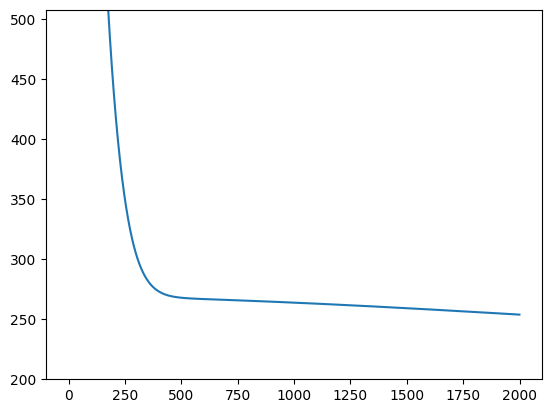

In [17]:
plt.plot(hist_cost)
plt.ylim([200, 2*c])

In [6]:
def predict_fn(x_data):
    return w*x_data+b


In [7]:
print(predict_fn(20))
print(predict_fn(24))

tf.Tensor([58.307606], shape=(1,), dtype=float32)
tf.Tensor([70.271255], shape=(1,), dtype=float32)


In [10]:
y_pred=predict_fn(x_data)

Text(0, 0.5, 'distance')

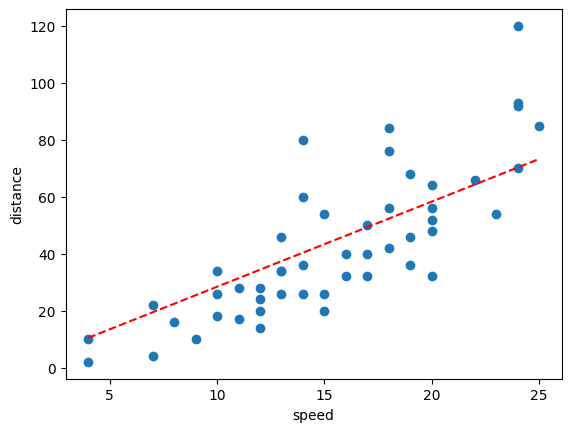

In [11]:
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred,'r--')
plt.xlabel("speed")
plt.ylabel("distance")